<center><h1>SENTIMENT ANALYSIS OF GLOBAL WARMING</h1></center>

Global Warming has become a major environmental concern in recent years. Rapid and massive industrial growth, urbanization, overall increase in the number of vehicles and appliances, increase in the usage of fossil fuels etc. have posed some major threats to the planet Earth and ‘Global warming’ is one of such hazardous environmental threats, the effects of which can be evidently observed though the changing weather patterns and overall increase in average temperature all around the world.


With the increase in problems pertaining to the ecological balance of planet Earth, We have also observed an increase in the general public awareness regarding these problems. People are speaking up, expressing their concern and trying to spread awareness regarding the dire need to protect our environment and this is how ignorance is gradually being eliminated from society. When it comes to speaking up and expressing your opinion and to make it reach billions of people , there is no better way than putting it up on social media. Among all the social media platforms, Twitter has been the first choice of people to put up their opinions and it definitely has the potential to be a strong digital forum for discussions over several issues and so is the case with global warming. Over the years people have been tweeting about how global warming is a serious issue that we've been facing, what can be the consequences if the ignorance persists and what are the possible solutions to curb it or atleast to slow down its rate. 
 
 
Since Twitter is a free medium which can be accessed by all, there are various opinions regarding this issue which necessarily do not match with each other. So in this project we are going to perform the sentiment analysis for global warming and will try to find if the sentiment is towards or against the existence of global warming i.e. whether people believe that global warming is occurring or not  and for the same we have obtained a dataset that contains tweets which represent people’s sentiments over global warming.

## Importing the Libraries

In [1]:
# Library for Reading and Data Manipulation
import numpy as np
import pandas as pd

# Library for Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Libraries for Modelling
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

# Libraries for Data Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for Testing Model Performance
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")

## Reading Data

In [3]:
df = pd.read_excel("data.xlsx")
df.head()

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [37]:
df['existence'].value_counts()

Y      2554
N      1053
Yes     557
No       61
Name: existence, dtype: int64

In [40]:
# Here 'Y' and 'Yes' --> 'Yes' and 'N' and 'No' --> 'No'
df[df['existence']=='Y'].head()

,tweet,existence,existence.confidence
1090,Are you ready for the climate change? PLI is w...,Y,0.6671
1091,LIVE TONIGHT: Fellow Heather Rogers joins Clim...,Y,1.0000
1092,Plan B: California Braces for Climate Change. ...,Y,0.6809
1093,Plants effective way of tackling global warmin...,Y,1.0000
1094,@angiemartinez & it's about 2 be 86 degrees ou...,Y,0.6760


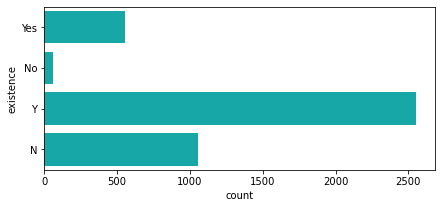

In [41]:
#Plotting histogram to see count of each category
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="existence", data=df, color="c");

In [9]:
# Seperating independent and dependet variables
X = df['tweet']

Y = []
for x in df['existence']:
    if x=="Y" or x == "Yes":
        Y.append(1)
    else:
        Y.append(0)

In [10]:
!pip install wordcloud

In [11]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

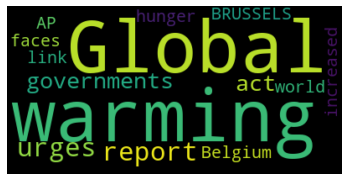

In [12]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 

# Start with one headline:
text = X[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

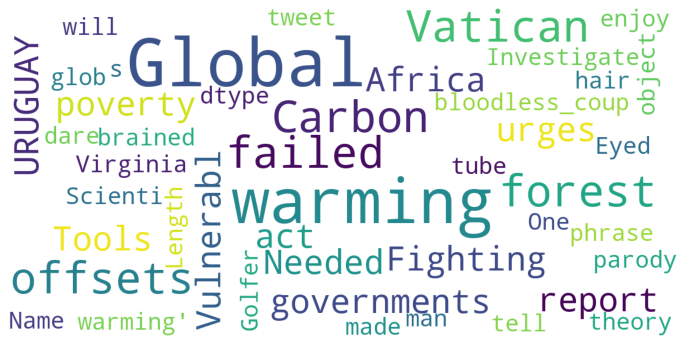

In [13]:
#importing the module
from wordcloud import WordCloud, STOPWORDS

#stopwords or unnecessary words
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

#function call
show_wordcloud(X)

In [14]:
#Printing all the possible category of news
labels = list(set(Y))
print('possible categories',labels)

possible categories [0, 1]


## Text Cleaning

In [15]:
# Step 1 : Normalizing the Text
def normalize(x):
    ans = []
    for st in x:
        norm = st.lower()
        ans.append(norm)
    
    return ans

In [16]:
# Normalizing the Text
X_normalized = normalize(X)

In [17]:
# Step 2 : Remove unicode characters
import re

def remove_unicode(x):
    ans = []
    for st in x:
        text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?:", "", st)
        ans.append(text)
        
    return ans

In [18]:
# Removing Unicode Character from Normalized Text
X_uni = remove_unicode(X_normalized)

In [19]:
# Step 3 : Remove StopWords
import nltk.corpus
#nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(x):
    ans = []
    for st in x:
        stop = stopwords.words('english')
        text = " ".join([word for word in st.split() if word not in (stop)])
        ans.append(text)
    
    return ans

In [20]:
# Remove the stopwords
X_remStop = remove_stopwords(X_uni)

In [21]:
# Step 4 : Stemming and Lemmatization

import nltk
# from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()

def lemma(x):
    ans = []
    
    for st in x:
        text = " ".join([lemmatizer.lemmatize(word) for word in st.split()])
        ans.append(text)
    return ans

In [22]:
X_lemma = lemma(X_remStop)

## Data Vectorization

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.



#### Term Frequency
This measures the frequency of a word in a document. This highly depends on the length of the document and the generality of the word, for example, a very common word such as “was” can appear multiple times in a document. But if we take two documents with 100 words and 10,000 words respectively, there is a high probability that the common word “was” is present more in the 10,000 worded document. But we cannot say that the longer document is more important than the shorter document. For this exact reason, we perform normalization on the frequency value, we divide the frequency with the total number of words in the document.


#### Inverse Document Frequency

IDF is the inverse of the document frequency which measures the informativeness of term t. When we calculate IDF, it will be very low for the most occurring words such as stop words (because they are present in almost all of the documents, and N/df will give a very low value to that word). This finally gives what we want, a relative weightage.

In [23]:
vectorizer=TfidfVectorizer()
x = vectorizer.fit_transform(X_lemma)
x.shape

(6090, 8968)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=0)

## Modelling

In [27]:
#Building the Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
text_clf = model.fit(X_train.toarray(), y_train)

In [29]:
#Predicting from the fitted model on train data
print('Predicting...\nIn Training Data')
predicted = text_clf.predict(X_train.toarray())

Predicting...
In Training Data


In [31]:
#Predicting from the fitted model on test data
pred1=text_clf.predict(X_test.toarray())

In [32]:
#Printing the accuracy of the model
acc1=accuracy_score(pred1,y_test)
print("Accuracy for Training Data : ",accuracy_score(predicted,y_train))
print("Accuracy for Testing Data : ",accuracy_score(pred1,y_test))

Accuracy for Training Data :  0.8977832512315271
Accuracy for Testing Data :  0.680623973727422


In [33]:
print(confusion_matrix(pred1,y_test))

[[310 119]
 [270 519]]


### Model 2 : MLPClassifier


MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.



In [47]:
#Building the Model
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,),random_state=1)
clf_neural.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10,), random_state=1,
              solver='lbfgs')

In [48]:
#Predicting from the fitted model on train data
print('Predicting...\nIn Training Data')
predicted = clf_neural.predict(X_train)

Predicting...
In Training Data


In [49]:
print('Predicting...\nIn Testing Data')
pred3=clf_neural.predict(X_test)

Predicting...
In Testing Data


In [50]:
#Printing the accuracy of the model
acc3=accuracy_score(pred3,y_test)
print("Accuracy for Training Data : ",accuracy_score(predicted,y_train))
print("Accuracy for Testing Data : ",accuracy_score(pred3,y_test))

Accuracy for Training Data :  0.9729064039408867
Accuracy for Testing Data :  0.715927750410509


In [51]:
print(confusion_matrix(pred3,y_test))

[[410 176]
 [170 462]]


## Model 3 : SGD Classifier

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification.



In [53]:
#Building the Model
sgd = SGDClassifier(random_state=1234)
sgd.fit(X_train,y_train)

SGDClassifier(random_state=1234)

In [54]:
#Predicting from the fitted model on train data
print('Predicting...\nIn Training Data')
predicted = sgd.predict(X_train)

Predicting...
In Training Data


In [55]:
#Predicting from the fitted model on test data
pred2=sgd.predict(X_test)

In [56]:
#Printing the accuracy of the model
acc2=accuracy_score(pred2,y_test)
print("Accuracy for Training Data : ",accuracy_score(predicted,y_train))
print("Accuracy for Testing Data : ",accuracy_score(pred2,y_test))

Accuracy for Training Data :  0.9345238095238095
Accuracy for Testing Data :  0.7438423645320197


In [57]:
print(confusion_matrix(pred2,y_test))

[[423 155]
 [157 483]]


<center><h1>Thank You